Model Accuracy: 0.8052


C:\Users\kavip\AppData\Local\Temp\ipykernel_79464\2087381765.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="coolwarm")


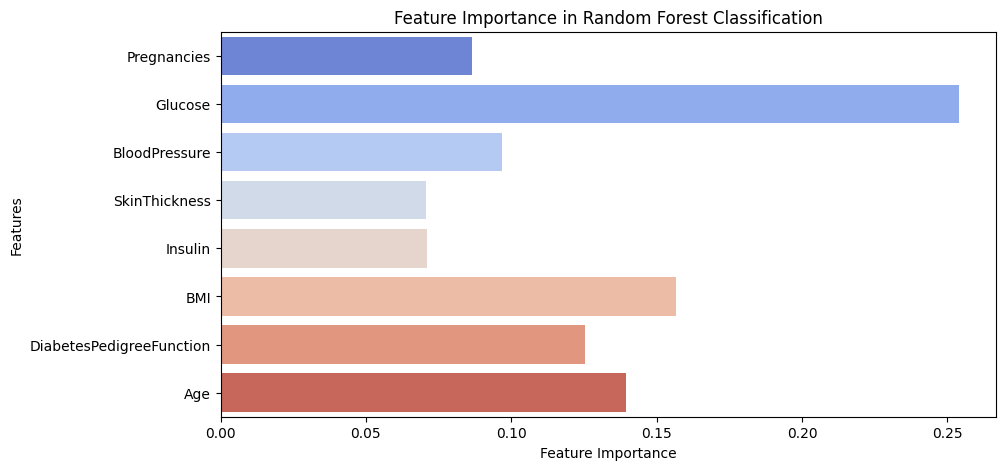

The most important feature contributing to predictions is: Glucose


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("diabetes.csv")

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df.columns = columns
=
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_to_replace:
    df[col] = df[col].replace(0, df[col].median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

feature_importances = model.feature_importances_
features = columns[:-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Classification")
plt.show()

most_important_feature = features[np.argmax(feature_importances)]
print(f"The most important feature contributing to predictions is: {most_important_feature}")